In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
from pyspark.sql.functions import col

In [4]:
from pyspark.sql.functions import desc

In [5]:
from pyspark.sql.functions import asc

In [6]:
import findspark

In [7]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

In [8]:
import pandas as pd

In [9]:
findspark.init()

In [10]:
spark = SparkSession.builder.appName('100M').getOrCreate()

In [11]:
Mens100m = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','Mens100m.csv').load()

In [12]:
Womens100m = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','Womens100m.csv').load()

In [13]:
Mens100m.createOrReplaceTempView("Mens100m")

In [14]:
Womens100m.createOrReplaceTempView("Womens100m")

In [15]:
resultOne = spark.sql("SELECT * FROM Mens100m")
resultOne.show()

+--------------------+-----+------------------+
|               Names|Times|           Schools|
+--------------------+-----+------------------+
|(1) Christian COL...| 9.82|         Tennessee|
|(2) Micah WILLIAMSSO| 9.86|            Oregon|
|(2) Divine ODUDURUJR| 9.86|        Texas Tech|
|(4) Courtney LIND...| 9.89|        Texas Tech|
|     (4) PJ AUSTINSR| 9.89|           Florida|
| (4) Ngoni MAKUSHASR| 9.89|     Florida State|
|(7) Godson OGHENE...|  9.9|               LSU|
|(7) Benjamin AZAM...|  9.9|    West Texas A&M|
| (7) Trayvon BROMELL|  9.9|            Baylor|
|(10) Shaun MASWAN...| 9.91|           Houston|
|(10) Terrence JON...| 9.91|        Texas Tech|
|(10) Davidson EZINWA| 9.91|     Azusa Pacific|
|(13) Udodi ONWUZU...| 9.92|          Stanford|
|   (13) Ato BOLDONSR| 9.92|              UCLA|
| — Oghenebrume {2}SO| 9.93|               LSU|
|       — Jones {2}JR| 9.93|        Texas Tech|
|    — Williams {2}SO| 9.93|            Oregon|
|(15) Cravon GILLE...| 9.93|            

In [16]:
resultTwo = spark.sql("SELECT * FROM Womens100m")
resultTwo.show()

+--------------------+-----+-------------------+
|               Names|Times|            Schools|
+--------------------+-----+-------------------+
|(1) Sha'Carri RIC...|10.75|                LSU|
|   (2) Dawn SOWELLSR|10.78|                LSU|
| (3) Julien ALFREDSO|10.81|              Texas|
|      — Alfred {2}JR|10.83|              Texas|
|      — Alfred {3}JR|10.84|              Texas|
|   (4) Aleia HOBBSJR|10.85|                LSU|
|(5) Melissa JEFFE...|10.88|   Coastal Carolina|
|(6) Twanisha TERRYSR|10.89|Southern California|
|       — Terry {2}SR|10.89|Southern California|
|      — Alfred {4}SO| 10.9|              Texas|
|  (7) Abby STEINERJR| 10.9|           Kentucky|
|       — Hobbs {2}SR| 10.9|                LSU|
|       — Hobbs {3}SR|10.91|                LSU|
|     — Steiner {2}JR|10.92|           Kentucky|
|(8) Cambrea STURG...|10.92| North Carolina A&T|
|     — Sturgis {2}SO|10.92| North Carolina A&T|
|       — Hobbs {4}SR|10.92|                LSU|
|(8) Jenna PRANDINIJ

In [17]:
QueryOneA = spark.sql("SELECT Times, COUNT(*) as count FROM Mens100m GROUP BY Times")

In [18]:
QueryOneA.show()

+-----+-----+
|Times|count|
+-----+-----+
| 9.93|   10|
| 9.82|    1|
|  9.9|    3|
| 9.96|    7|
| 9.92|    2|
| 9.94|    2|
| 9.86|    2|
| 9.89|    3|
| 9.91|    3|
+-----+-----+



In [19]:
QueryOneB = spark.sql("SELECT Times, COUNT(*) as count FROM Womens100m GROUP BY Times")

In [20]:
QueryOneB.show()

+-----+-----+
|Times|count|
+-----+-----+
|10.88|    1|
|10.78|    1|
|10.95|    5|
|10.89|    2|
|10.93|    4|
|10.85|    1|
|10.96|    7|
|10.81|    1|
|10.97|    3|
|10.98|   11|
| 10.9|    3|
|10.75|    1|
|10.91|    1|
|10.84|    1|
|10.83|    1|
|10.92|    5|
+-----+-----+



In [21]:
QueryTwoA = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Mens100m)) * 100 as percentage FROM Mens100m GROUP BY Times")

In [22]:
QueryTwoA.show()

+-----+-----+------------------+
|Times|count|        percentage|
+-----+-----+------------------+
| 9.93|   10|30.303030303030305|
| 9.82|    1|3.0303030303030303|
|  9.9|    3| 9.090909090909092|
| 9.96|    7| 21.21212121212121|
| 9.92|    2|6.0606060606060606|
| 9.94|    2|6.0606060606060606|
| 9.86|    2|6.0606060606060606|
| 9.89|    3| 9.090909090909092|
| 9.91|    3| 9.090909090909092|
+-----+-----+------------------+



In [23]:
QueryTwoB = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Womens100m)) * 100 as percentage FROM Womens100m GROUP BY Times")

In [24]:
QueryTwoB.show()

+-----+-----+------------------+
|Times|count|        percentage|
+-----+-----+------------------+
|10.88|    1| 2.083333333333333|
|10.78|    1| 2.083333333333333|
|10.95|    5|10.416666666666668|
|10.89|    2| 4.166666666666666|
|10.93|    4| 8.333333333333332|
|10.85|    1| 2.083333333333333|
|10.96|    7|14.583333333333334|
|10.81|    1| 2.083333333333333|
|10.97|    3|              6.25|
|10.98|   11|22.916666666666664|
| 10.9|    3|              6.25|
|10.75|    1| 2.083333333333333|
|10.91|    1| 2.083333333333333|
|10.84|    1| 2.083333333333333|
|10.83|    1| 2.083333333333333|
|10.92|    5|10.416666666666668|
+-----+-----+------------------+



In [25]:
#The Most common time ran by collegiates in-season is 9.93, followed by 9.96....

In [ ]:
#The most common time ran in the collegiate season is 10.98, followed by 10.96....

In [ ]:
#The greatest 100m school on the womens side is LSU, followed by Texas...

In [28]:
QueryThreeA = spark.sql("SELECT Schools, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Mens100m)) * 100 as percentage FROM Mens100m GROUP BY Schools")

In [29]:
QueryThreeA.show()

+------------------+-----+------------------+
|           Schools|count|        percentage|
+------------------+-----+------------------+
|            Auburn|    2|6.0606060606060606|
|            Oregon|    3| 9.090909090909092|
|     Azusa Pacific|    2|6.0606060606060606|
|             Texas|    1|3.0303030303030303|
|               LSU|    3| 9.090909090909092|
|North Carolina A&T|    1|3.0303030303030303|
|        Texas Tech|    5|15.151515151515152|
|            Baylor|    1|3.0303030303030303|
|          Stanford|    1|3.0303030303030303|
|              UCLA|    2|6.0606060606060606|
|     Florida State|    3| 9.090909090909092|
|      UT Arlington|    1|3.0303030303030303|
|           Houston|    2|6.0606060606060606|
|    West Texas A&M|    2|6.0606060606060606|
|         Tennessee|    2|6.0606060606060606|
|           Florida|    1|3.0303030303030303|
|           Clemson|    1|3.0303030303030303|
+------------------+-----+------------------+



In [30]:
QueryThreeB = spark.sql("SELECT Schools, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Womens100m)) * 100 as percentage FROM Womens100m GROUP BY Schools")

In [31]:
QueryThreeB.show()

+-------------------+-----+------------------+
|            Schools|count|        percentage|
+-------------------+-----+------------------+
|             Oregon|    5|10.416666666666668|
|              Texas|    9|             18.75|
|                LSU|   13|27.083333333333332|
| North Carolina A&T|    5|10.416666666666668|
|       Miami (Fla.)|    1| 2.083333333333333|
|            Georgia|    1| 2.083333333333333|
|          Texas A&M|    1| 2.083333333333333|
|            Alabama|    3|              6.25|
|   Coastal Carolina|    2| 4.166666666666666|
|           Kentucky|    2| 4.166666666666666|
|Southern California|    3|              6.25|
|          Tennessee|    2| 4.166666666666666|
|    San Diego State|    1| 2.083333333333333|
+-------------------+-----+------------------+



In [32]:
Mens100mDF = pd.read_csv('Mens100m.csv')
Mens100mDF

,Names,Times,Schools
0,(1) Christian COLEMANJR,9.82,Tennessee
1,(2) Micah WILLIAMSSO,9.86,Oregon
2,(2) Divine ODUDURUJR,9.86,Texas Tech
3,(4) Courtney LINDSEYSR,9.89,Texas Tech
4,(4) PJ AUSTINSR,9.89,Florida
5,(4) Ngoni MAKUSHASR,9.89,Florida State
6,(7) Godson OGHENEBRUMESO,9.90,LSU
7,(7) Benjamin AZAMATISO,9.90,West Texas A&M
8,(7) Trayvon BROMELL,9.90,Baylor
9,(10) Shaun MASWANGANYIJR,9.91,Houston


In [34]:
Womens100mDF = pd.read_csv('Womens100m.csv')
Womens100mDF

,Names,Times,Schools
0,(1) Sha'Carri RICHARDSONFR,10.75,LSU
1,(2) Dawn SOWELLSR,10.78,LSU
2,(3) Julien ALFREDSO,10.81,Texas
3,— Alfred {2}JR,10.83,Texas
4,— Alfred {3}JR,10.84,Texas
5,(4) Aleia HOBBSJR,10.85,LSU
6,(5) Melissa JEFFERSONSO,10.88,Coastal Carolina
7,(6) Twanisha TERRYSR,10.89,Southern California
8,— Terry {2}SR,10.89,Southern California
9,— Alfred {4}SO,10.90,Texas


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\MoJo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


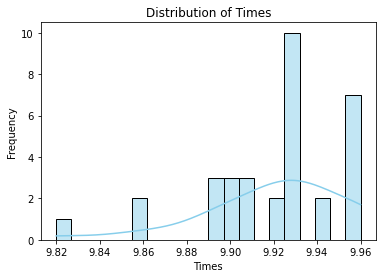

In [37]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(Mens100mDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name}')

# Show the plot
plt.show()


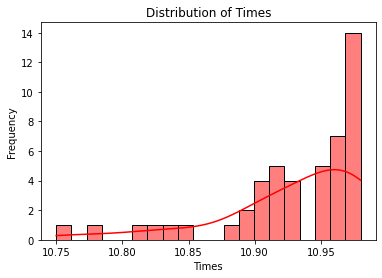

In [38]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(Womens100mDF[column_name], bins=20, kde=True, color='red', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name}')

# Show the plot
plt.show()


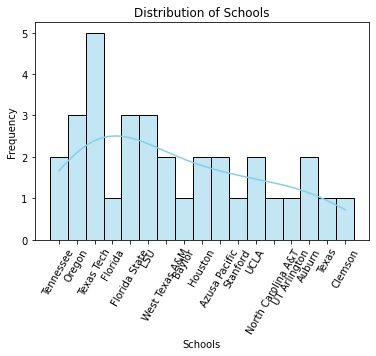

In [40]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(Mens100mDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.xticks(rotation=60)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name}')

# Show the plot
plt.show()


In [ ]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(Womens100mDF[column_name], bins=20, kde=True, color='red', edgecolor='black')

plt.xticks(rotation=60)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name}')

# Show the plot
plt.show()
